# factor_demo

## 导入模块

In [1]:
import sys
sys.path.append('../../public-Git/')

from demo_Alpha.factor_function import *
from utils.stg_functions_local import *
from utils.performance import corr_local_V2

%matplotlib inline

## 定义股票池和基准指数

In [2]:
stock_universe = '999998'
index_code = '000905'

## 定义因子类

### 跳跃收益因子

In [3]:
class fill_ret_jump(Factor):
    name = 'fill_ret_jump'
    islimitbuy = False
    islimitsell = False
    dependencies = ['close']

    def calc(self, data):
        close = data['close']
        factor = feather.read_dataframe('../data/ret_jump/fill_neutral_ret_jump.feather')
        factor = factor.pivot(index='date', columns='issue', values='neutral_factor')
        factor = factor.reindex(index=close.index, columns=close.columns)
        return factor

In [8]:
class ret_jump_daily(Factor):
    name = 'ret_jump_daily'
    islimitbuy = True
    islimitsell = True
    dependencies = ['close']

    def calc(self, data):
        close = data['close']
        factor = feather.read_dataframe('../data/ret_jump_daily/neutral_ret_jump.feather')
        factor = factor.pivot(index='date', columns='issue', values='neutral_factor')
        factor = factor.reindex(index=close.index, columns=close.columns)
        return factor

### 点度中心性因子

In [5]:
class N_connect(Factor):
    name = 'fill_N_connect'
    islimitbuy = False
    islimitsell = False
    dependencies = ['close']

    def calc(self, data):
        close = data['close']
        factor = feather.read_dataframe('../data/N_connect_1_any/fill_neutral_N_connect_num.feather')
        factor = factor.pivot(index='date', columns='issue', values='neutral_factor')
        factor = factor.reindex(index=close.index, columns=close.columns)
        return factor

### 跳跃关联动量因子

In [6]:
class peer_relative_ret(Factor):
    name = 'fill_peer_relative_ret'
    islimitbuy = False
    islimitsell = False
    dependencies = ['close']

    def calc(self, data):
        close = data['close']
        factor = feather.read_dataframe('../data/peer_ret/fill_neutral_peer_ret_num.feather')
        factor = factor.pivot(index='date', columns='issue', values='peer_relative_ret')
        factor = factor.reindex(index=close.index, columns=close.columns)
        return factor

## 回测

开始计算ret_jump_daily
因子数据计算完成，耗时0:00:02.293989
********************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************
ret_jump_daily------输出对标超额收益模式指标
Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 5.0%, not exceeded: OK!
FactorValues Quantiles Statistics


,min,max,mean,std,count,daily_count,count %
factor_quantile,,,,,,,
1,-0.677577,-0.043791,-0.158964,0.045127,130597,99.0,2.51
2,-0.213620,-0.032003,-0.110019,0.020325,129937,99.0,2.49
3,-0.178346,-0.027539,-0.092517,0.017028,129912,99.0,2.49
4,-0.150333,-0.025180,-0.081184,0.015092,129958,99.0,2.50
5,-0.131970,-0.021811,-0.072643,0.013638,129927,99.0,2.49
6,-0.117233,-0.019380,-0.065726,0.012496,129883,98.0,2.49
7,-0.104212,-0.016991,-0.059833,0.011510,129888,99.0,2.49
8,-0.094122,-0.015277,-0.054646,0.010587,130047,99.0,2.50
9,-0.088794,-0.014193,-0.049984,0.009775,129794,98.0,2.49


Turnover Analysis


,1D
Quantile 1 Mean Turnover,0.253
Quantile 2 Mean Turnover,0.513
Quantile 3 Mean Turnover,0.632
Quantile 4 Mean Turnover,0.701
Quantile 5 Mean Turnover,0.743
Quantile 6 Mean Turnover,0.772
Quantile 7 Mean Turnover,0.795
Quantile 8 Mean Turnover,0.810
Quantile 9 Mean Turnover,0.823
Quantile 10 Mean Turnover,0.832


,1D
Mean Factor Rank Autocorrelation,0.943




benchmark AnalysisMode Returns Analysis 


,1D
Top Ret,-59.47
Bottom Ret,1.75
Top RetAE,-66.15
Bottom RetAE,-6.22
Top RetAE MDD,-97.50
Top RetAE SPR,-3.76




benchmark AnalysisMode Returns Analysis By Year 


,Top Ret,Top RetAE,Bottom Ret,Bottom RetAE,Spread Ret,Spread RetAE,RetAE Top SPR,RetAE Top MDD
date,,,,,,,,
2019,-67.78,-74.93,12.30,3.96,-80.08,-95.58,-6.41,-53.84
2020,-54.61,-61.70,-13.23,-21.18,-41.38,-56.43,-3.22,-47.95
2021,-53.80,-60.45,4.58,-3.18,-58.38,-72.78,-3.69,-47.30
2022,-59.40,-66.05,7.66,-0.34,-67.07,-81.73,-3.84,-51.25
2023,-41.96,-47.77,12.85,5.21,-54.81,-68.26,-3.24,-39.27
2024,-108.27,-115.07,-36.41,-44.78,-71.86,-87.03,-3.71,-39.87




Information Analysis


,1D
IC Mean,-0.037
IR,-0.692
Good IC Ratio,0.739
IC Mean SD_20D,-0.373
IR SD_20D,-1.351
IC Mean SD_60D,-0.515
IR SD_60D,-2.366




                                      1D
Top RetAE                     -66.149697
Top RetAE MDD                 -97.504791
Top RetAE SPR                  -3.763089
IC_20                          -0.373144
IR_20                          -1.350672
IC_60                          -0.514659
IR_60                          -2.365741
Bottom RetAE                   -6.221858
Mean turnover Top Quantile      0.252552
Mean turnover Bottom Quantile   0.211624
********************************************************************************************************************************************************************************************************

********************************************************************************************************************************************************************************************************
ret_jump_daily------输出贴近实际交易的净值模式指标
                            value
Annualized Return(%)   -68.078742
Annualized ReturnAE(%) -74.816595
max_dr

<Figure size 640x480 with 0 Axes>

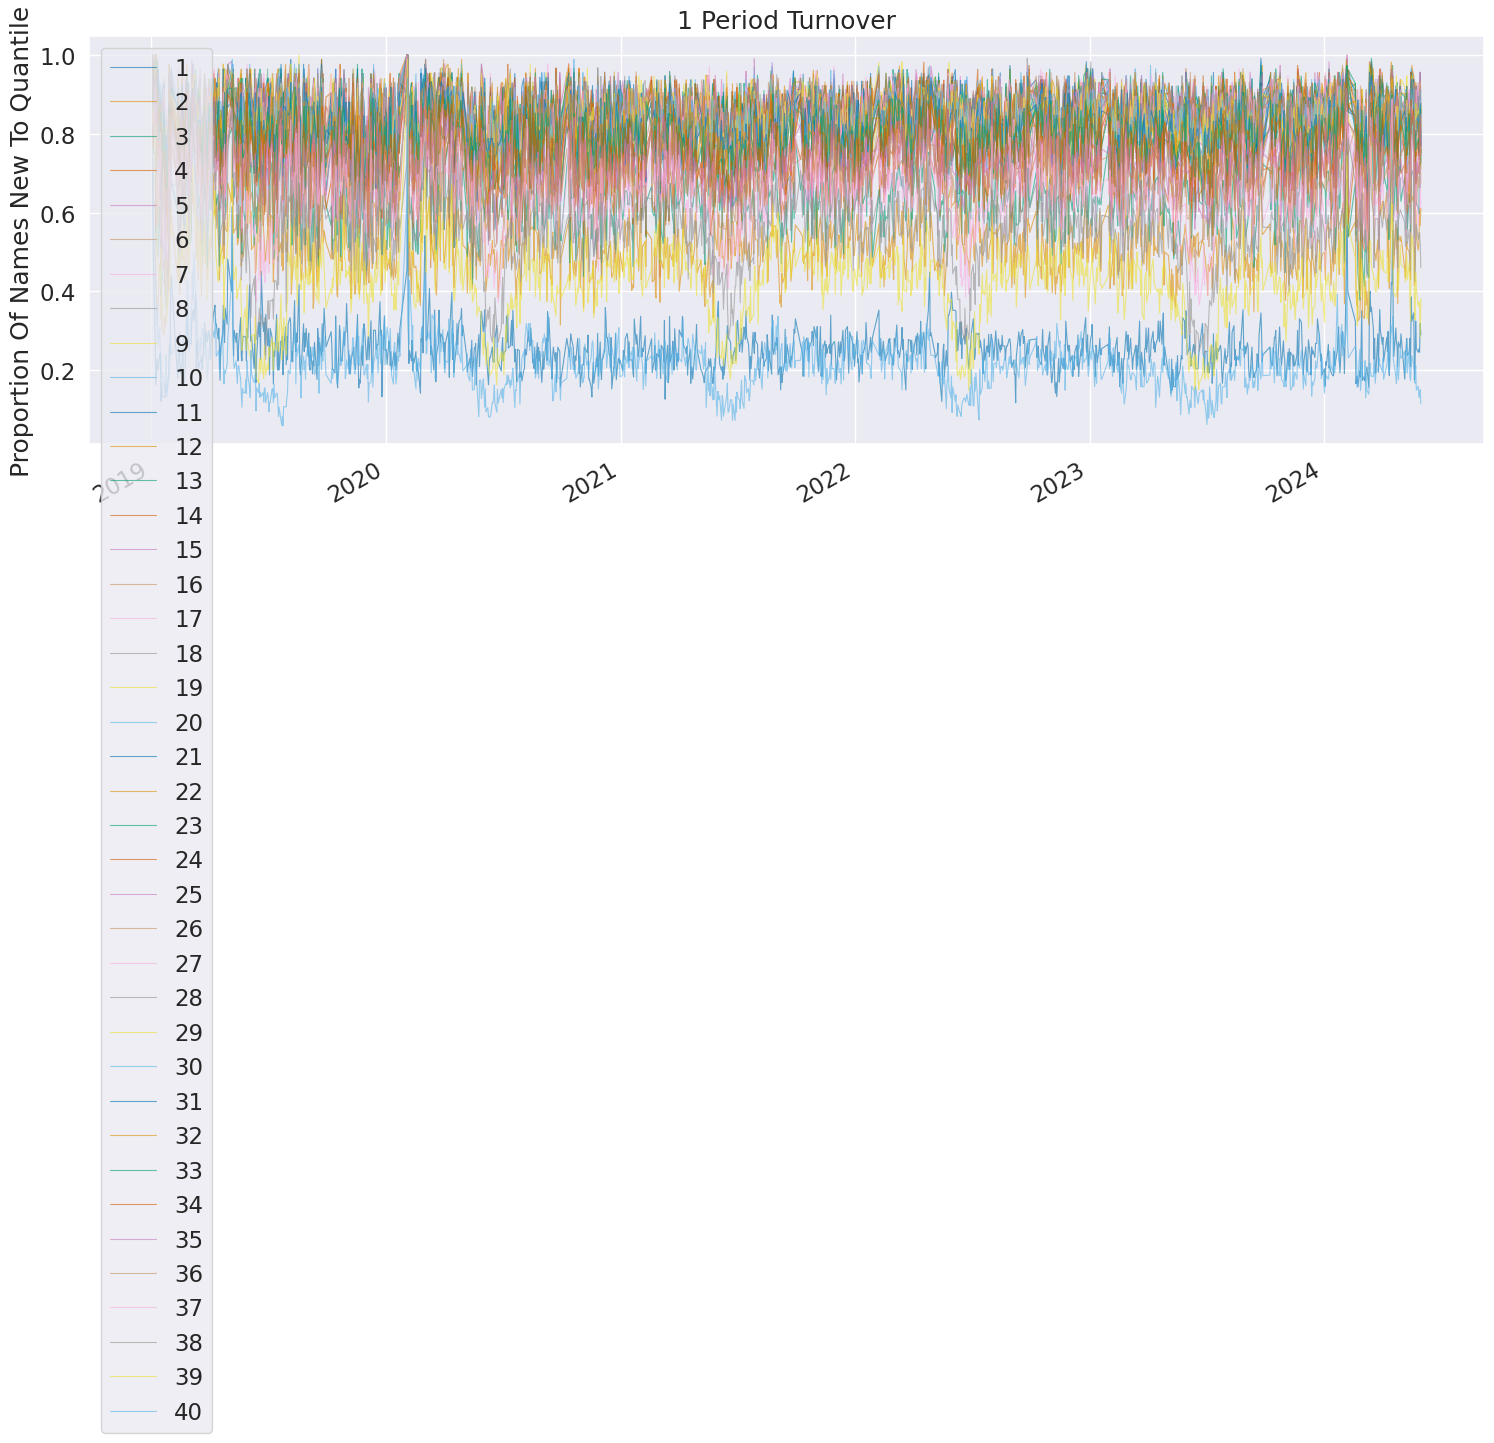

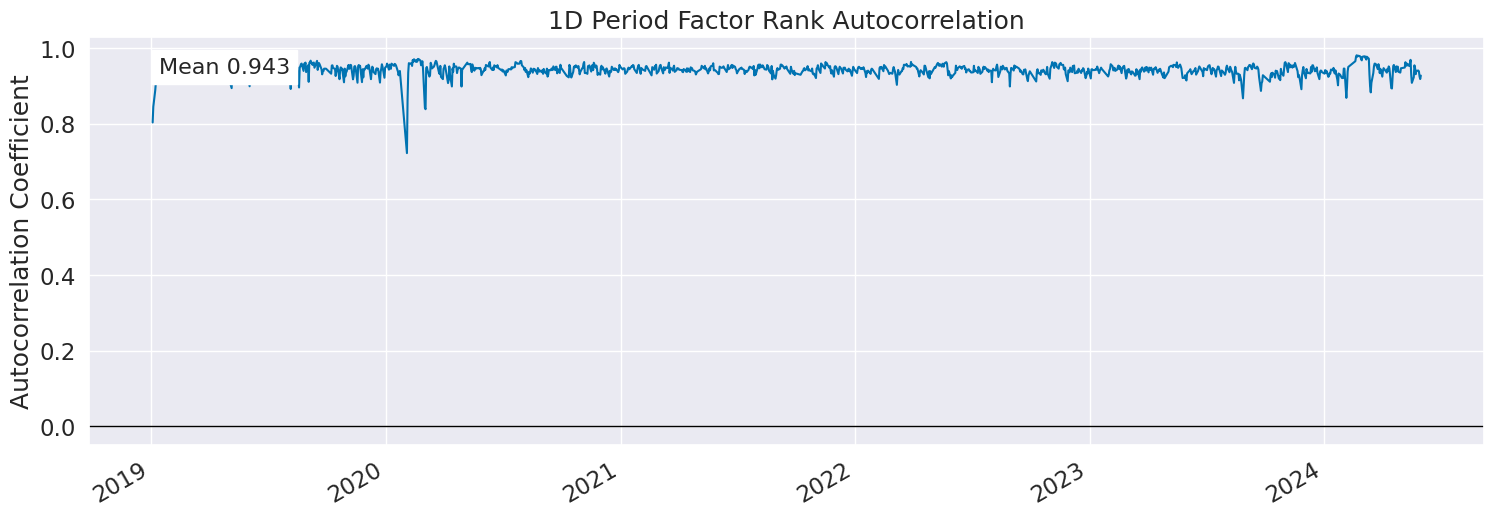

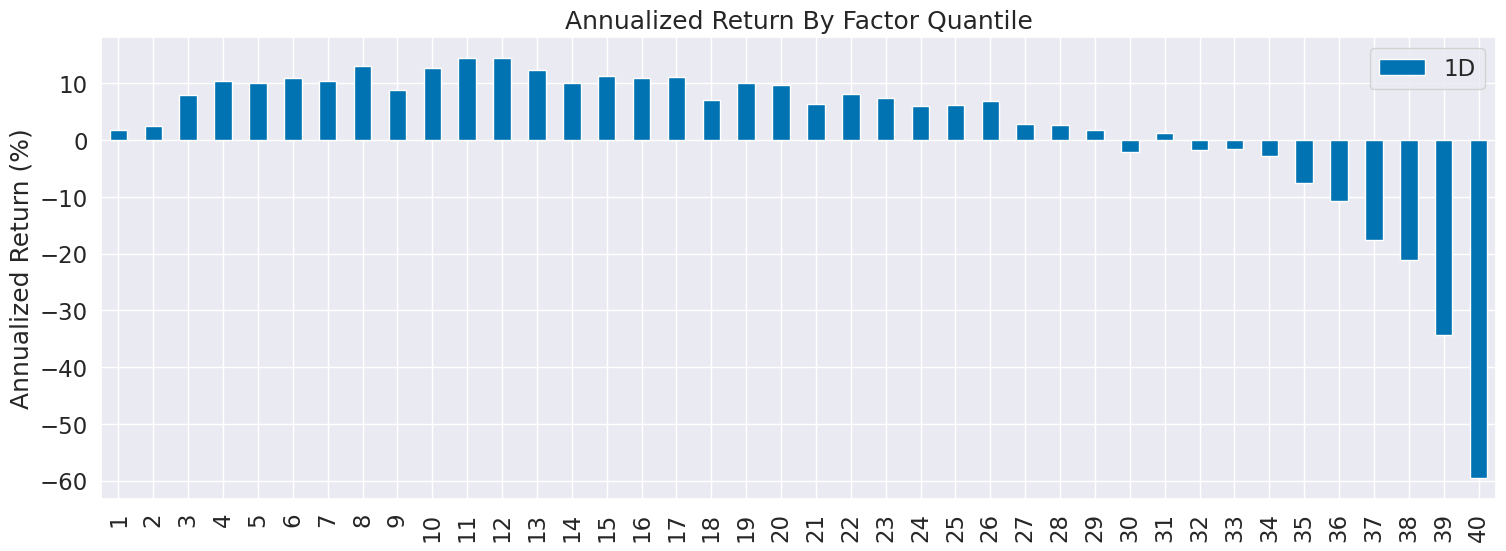

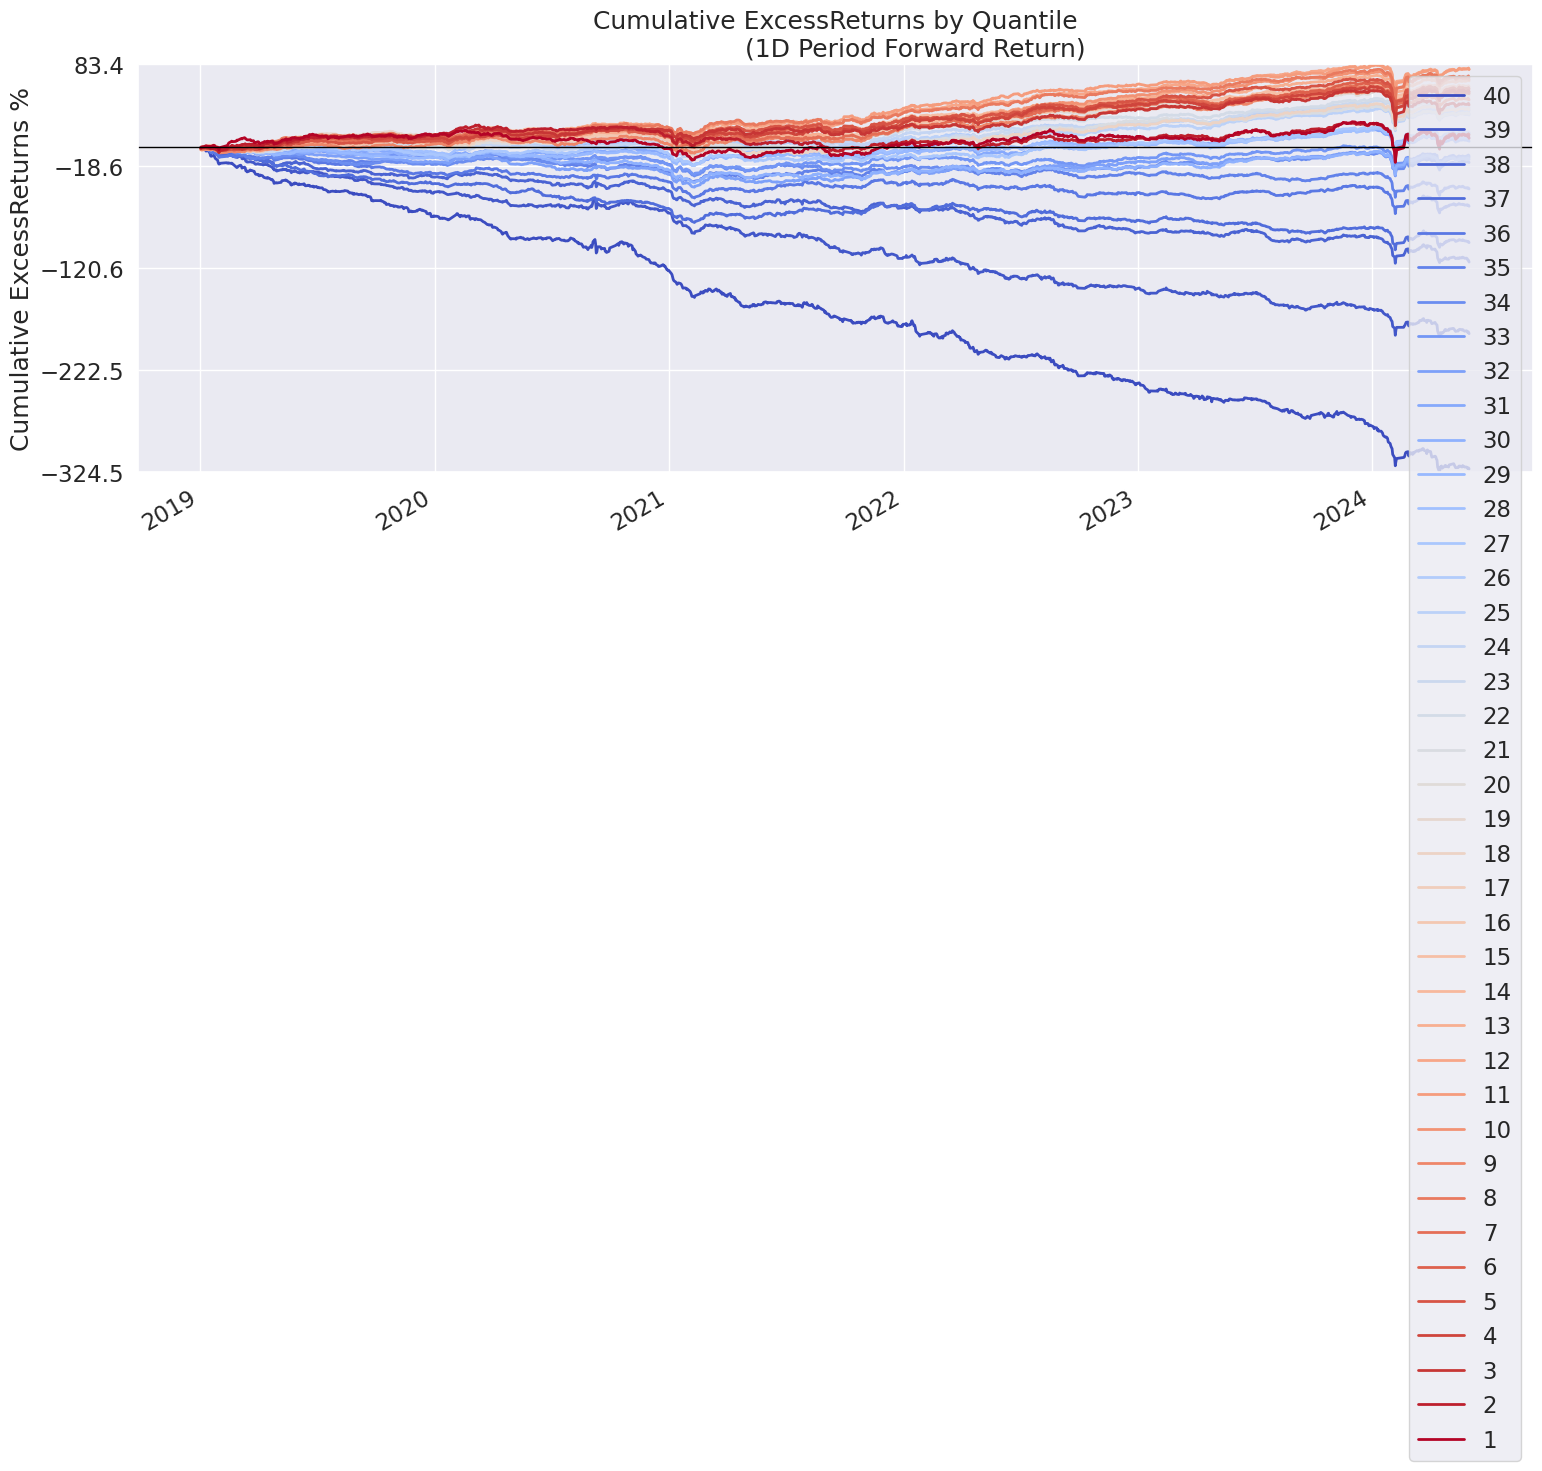

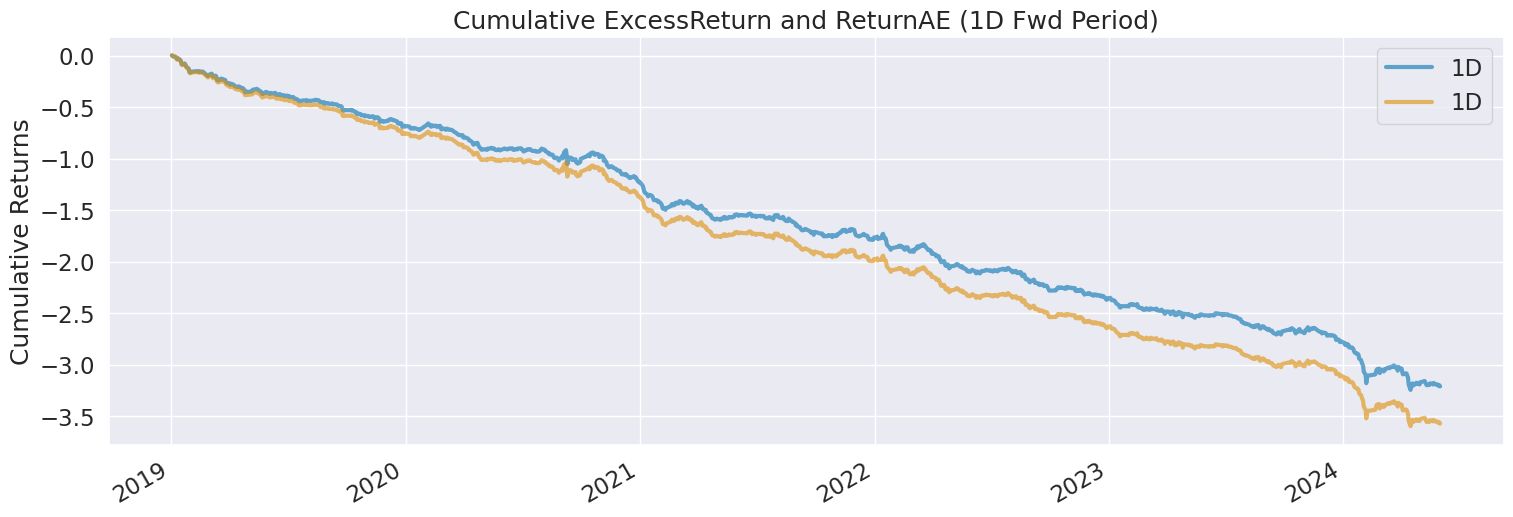

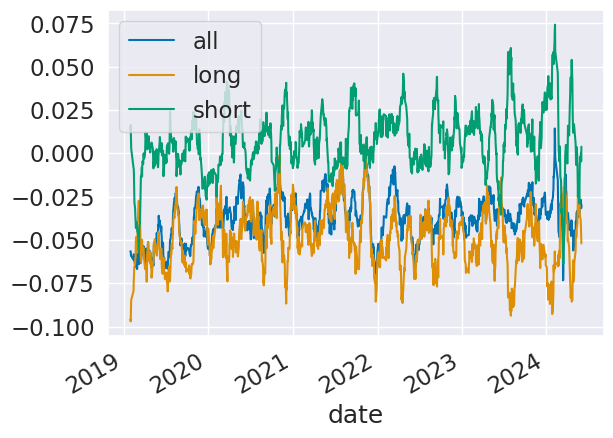

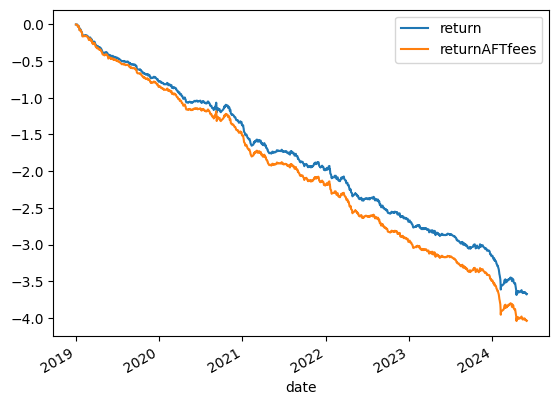

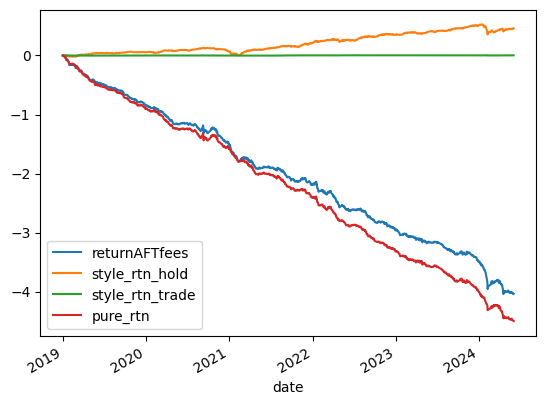

In [9]:
start_datetime = datetime.datetime(2019, 1, 1)
end_datetime = datetime.datetime(2024, 5, 31)

# start_datetime = datetime.datetime(2019, 8, 1)
# end_datetime = datetime.datetime(2024, 12, 31)

factor = ret_jump_daily()

time_tik = datetime.datetime.now()
print(f"开始计算{factor.name}")
factorResults = analysis(
    start_datetime=start_datetime,
    end_datetime=end_datetime,
    factor_objs=[factor,],
    stock_universe=stock_universe,
    benchmark=index_code,
    plot=True
)
print(f"{factor.name}计算完成，耗时{datetime.datetime.now()-time_tik}")

# %
date_index = pd.to_datetime(
    sd.get_trade_date(
        start_datetime.strftime('%Y-%m-%d'),
        end_datetime.strftime('%Y-%m-%d')
    )['trade_date']
)
dailyExcessReturns = (
    factorResults['ret_Data']['ret_wide_ae']
        .iloc[:, -1]
        .rename('factor')
        .reindex(date_index)
        .shift(1)
        .dropna()
)
dailyIC = (
    factorResults['IC_data_raw']
        .iloc[:, 0]
        .rename('factor')
        .reindex(date_index)
        .shift(1)
        .dropna()
)
dailyICLong = (
    factorResults['ic_data_long']
        .iloc[:, 0]
        .rename('factor')
        .reindex(date_index)
        .shift(1)
        .dropna()
)
dailyICShort = (
    factorResults['ic_data_short']
        .iloc[:, 0]
        .rename('factor')
        .reindex(date_index)
        .shift(1)
        .dropna()
)

print('2023年以前')
RetCorr_Table, RetR2_Table, ICCorr_Table, ICLCorr_Table, ICSCorr_Table = corr_local_V2(
    dailyExcessReturns,
    dailyIC,
    dailyICLong,
    dailyICShort,
    lastday=datetime.datetime(2023, 12, 31),
    warnings=0.6
)
print('*'*10)
print('全样本除2024年1、2月')
RetCorr_Table, RetR2_Table, ICCorr_Table, ICLCorr_Table, ICSCorr_Table = corr_local_V2(
    dailyExcessReturns,
    dailyIC,
    dailyICLong,
    dailyICShort,
    lastday=datetime.datetime(2025, 12, 31),
    warnings=0.6
)